<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/2_3_6_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC%EC%9D%98_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=a8d6febc9eb2d922254de5ee4957af904d6d027cdb21abb228c3ed13d1ff92c5
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

sns.set(font_scale=2)


from pandas.core.common import random_state
from scipy.sparse.construct import random

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import graphviz

# 소개

앙상블은 여러 머신러닝 모델을 연결해서 더 강력한 모델 만드는 기법이다.
그중 두개의 아상블 모델이 분류와 회귀 문제의 다양한 데이터셋에서 효과적으로 입증되었다.

\
random forest , gradient boosting

\
둘 다 모델을 구성하는 기본 요소로 결정트리를 이용한다.

## 1) random forest

램덤 포래스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만, 데이텅의 일부에 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다는 것.

\
전략구현

따라서 결정 트리를 많이 만들어야 한다. 가각의 트리는 타깃 예측을 잘하고 다른 트리와 구별되어야 한다. 램덤포레스트에서 트리를 램덤하게 만드는 방법은 두 가지이다. 
- 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택
- 분할 테스트에서 특성을 무작위로 선택


In [ ]:
# two moon 데이터셋을 가지고 트리 5개로 구성된 램덤 포레스트 모델을 만들어 보자

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) # 샘플 100개
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) # 트리 5개
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

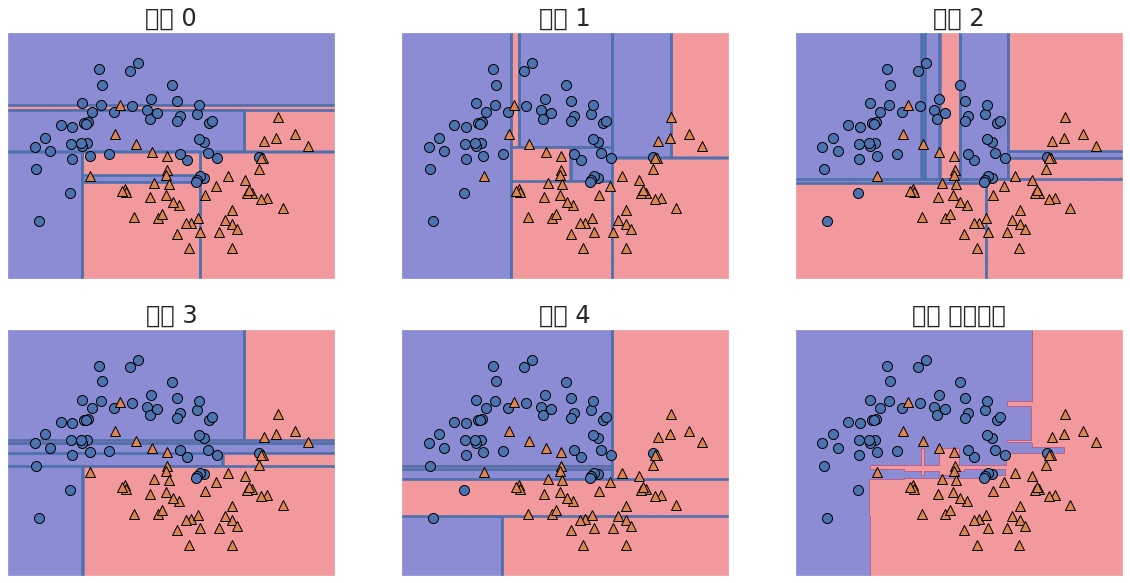

In [ ]:
# 각 트리에 결정 경계 시각화, 취합된 결정경계 시각화

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title('트리 {}'.format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("램덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 각 트리에 따라 결정 경계가 다르다는 걸 알 수 있다.
# 랜덤 포레스트는 개객의 트리보다 덜 과대적합하며, 더 좋은 경계를 보여준다
# 실제 애플리케이션은 더 많은 트리를 쓰므로 더 부드러운 결정결계가 만들어진다.

In [ ]:
# 유방암 데이터셋에 100개의 트리로 이루어진 랜덤 포레스트를 적용해보자
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("훈련 테스트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

# 선형 모델이나 단일 트리 보다 높은 정확도
# 가지치기 필요해보인다

훈련 세트 정확도: 1.000
훈련 테스트 정확도: 0.972


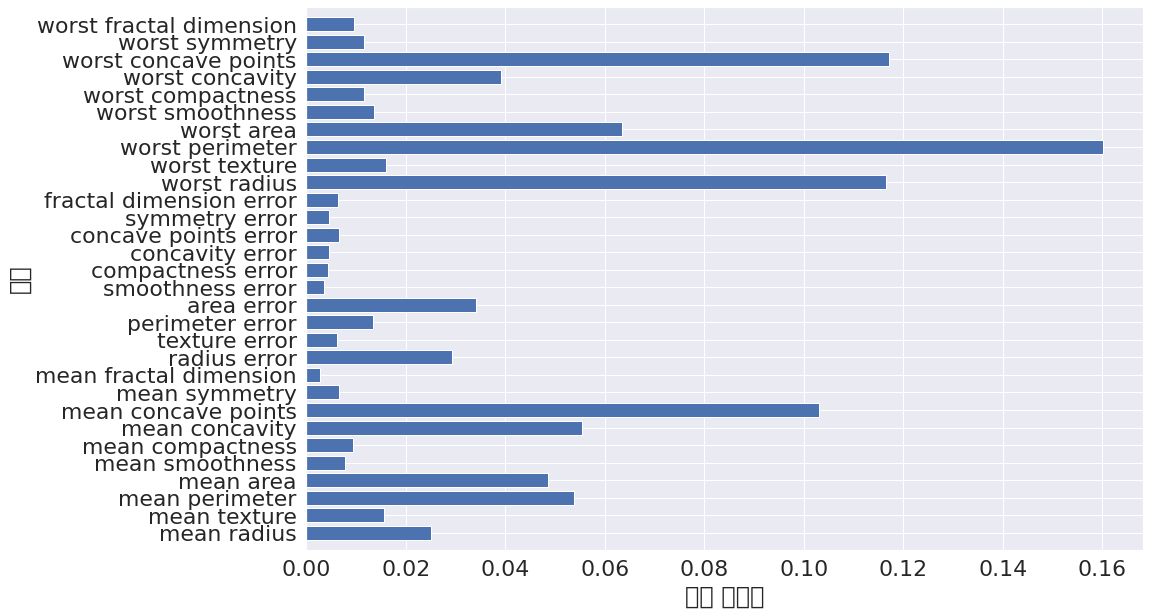

In [ ]:
# 랜덤 트리도 특성 중요도를 보여준다. 또한 단일 트리보다 신뢰할 수 있다

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[-1]
  plt.figure(figsize=(15, 10))
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("특성 중요도")
  plt.ylabel("특성")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

단일 트리와 비교하기

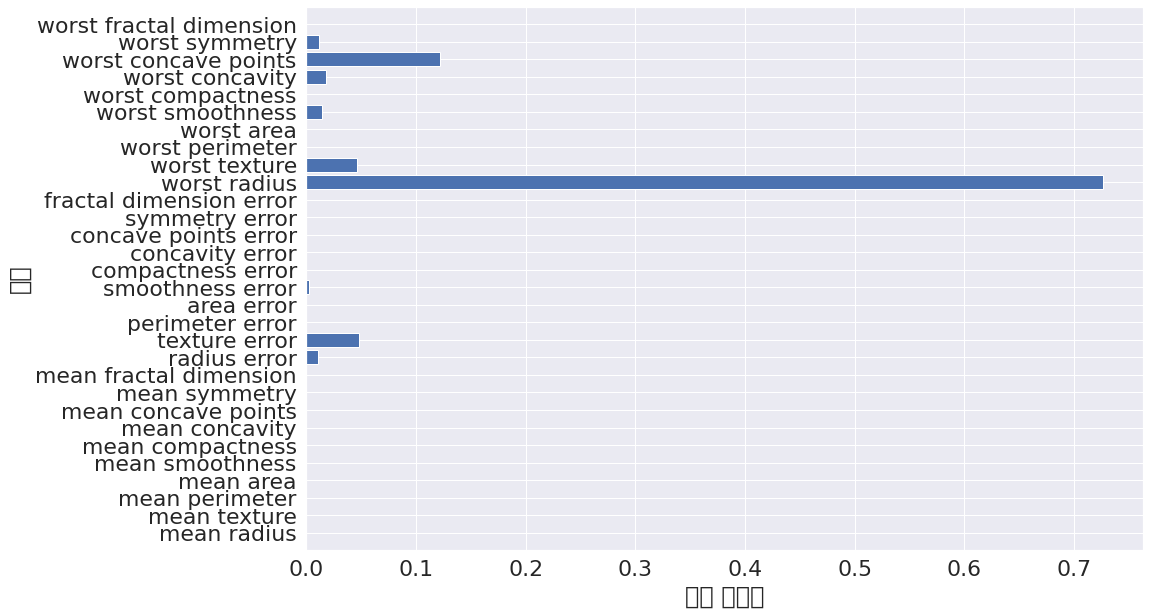

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth= 4 ,random_state = 0)
tree.fit(X_train, y_train)

plot_feature_importances_cancer(tree)

### 결론

랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.
성능이 좋고 매개변수 튜닝을 많이 하지 않아도 잘 작동하고 데이터 스케일을 맞출 필요가 없기 때문이다.
다만 비전문가에게 예측과정을 보여주어야 하거나, 의사 결정 과정을 간소화 해야 한다면 단이 트리를 사용할 수 있다.

\
유념사항
- 다른 random_state를 지정하면 전혀 다른 모델이 만들어진다. 만약 같은 결과를 만들어야 한다면 random_state를 고정하고, 변동을 줄인다면 트리를 많이 만든다.
- 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터는 잘 작동 하지 않기 때문에 선형 모델을 사용한다
- n_estimators 는 클 수록 좋다, 하지만 그 만큼 더 많은 훈련시간과 메모리가 든다. 그래서 가용가능 한 만큼 올려야 한다.
-가지치기를 하면 가끔 성능이 향상되거나, 훈련과 예측에 필요한 메모리와 시간을 줄여 주기도 한다(일반적으로 기본 값을 쓰는 것이 좋다)


## 2) gradient boosting
그레디언트 부스팅 회귀 트리는 여러개의 결정 트리를 묶는다.
회귀와 분류 모두 사용할 수 있다.

\
랜덤 포레스트와 다른점
- 이전 트리의 오차를 보완하는 방식으로 순차적 운용
- 무작위성이 없다. 대신 사전 가지치기를 사용한다.
- 보통 하나에서 다섯 정도에 깊지 않는 트리 사용, 메모리 부담적고 예측빠르다
- 얕은 트리를 많이 연결, 각 트리는 데이터 일부만 예측, 따라서 많이 추가될 수록 성능이 좋다진다.

\
그레디언트 부스팅 트리는 머신러닝 경연 대회에서 우승을 많이 차지했고 업계에서도 널리 사용한다. 랜덤 보다는 매개설정에 조금 더 민감하나 잘 조정하면 더 좋은 정확도를 제공한다.

\
사전 가지치기, 트리 개수 외에도 중요한 매개변수가 있다.
이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어하는 "learning_rate"
학습률이 트면 보정을 너무 강하게 해서 복잡한 모델이 되고 만다.
n_estimators 값을 키우면, 앙상블 트리가 더 많이 추가 되어 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많이 만들어 진다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

# 과대적합
# 가지치기 올리기

훈련 정확도: 1.000
테스트 정확도: 0.965


In [ ]:
# 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있다
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 정확도: 0.991
테스트 정확도: 0.972


In [ ]:
# 트리 오차 규제 약하게
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

# 트리 깊이 조정에 비해 선능 개선율이 낮다. 

훈련 정확도: 0.988
테스트 정확도: 0.965


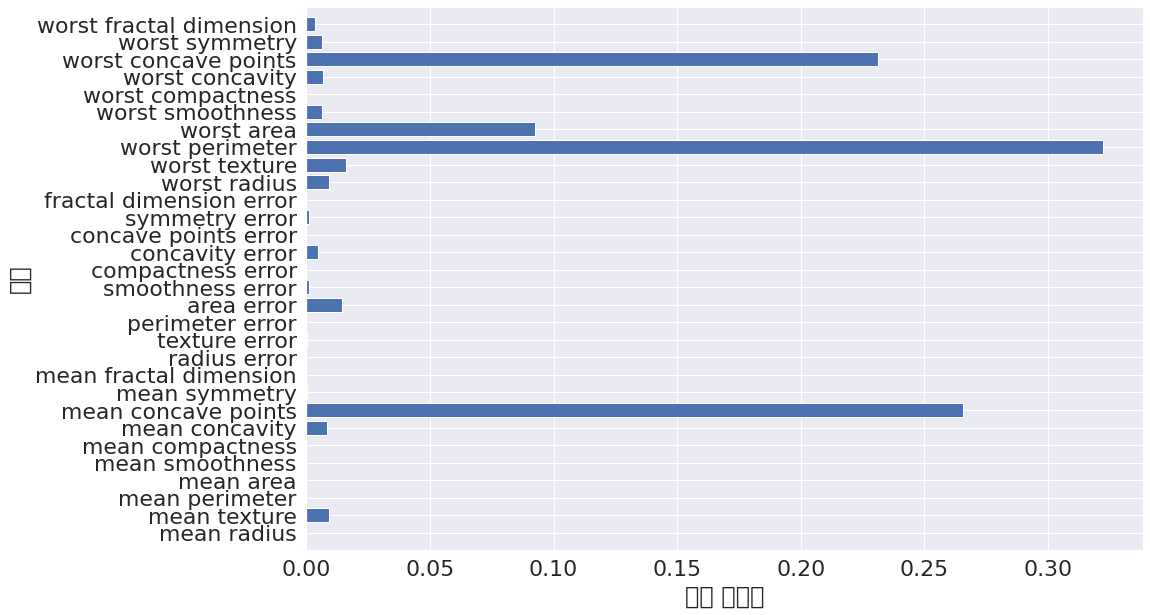

In [ ]:
# 트리 깊이 1 > 시각화
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

# 랜덤과 다르게 일부 특성을 강조하고 있다
# 일반적으로 더 안정적인 랜덤을 먼저 적용하다가, 예측 시간이 중요하거나 성능을 마지막으로 쥐어 짜야하는 경우 그레디언트 부스팅을 사용한다.

### 결론

그레디는 지도 학습에서 가장 강력하고 널리 사용하는 모델 중 나나다.
그러나 가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련시간이 길다는 것이다. 그리고 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않는다.

## 3) 그 외 다른 앙상블

Bagging / Adaboost / Extra-Tree / Histogram-based Gradient Boosting

### Bagging

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules:
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz

In [ ]:
from preamble import *


Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [ ]:
# bagging

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 세트 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 세트 정확도: 0.948


In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

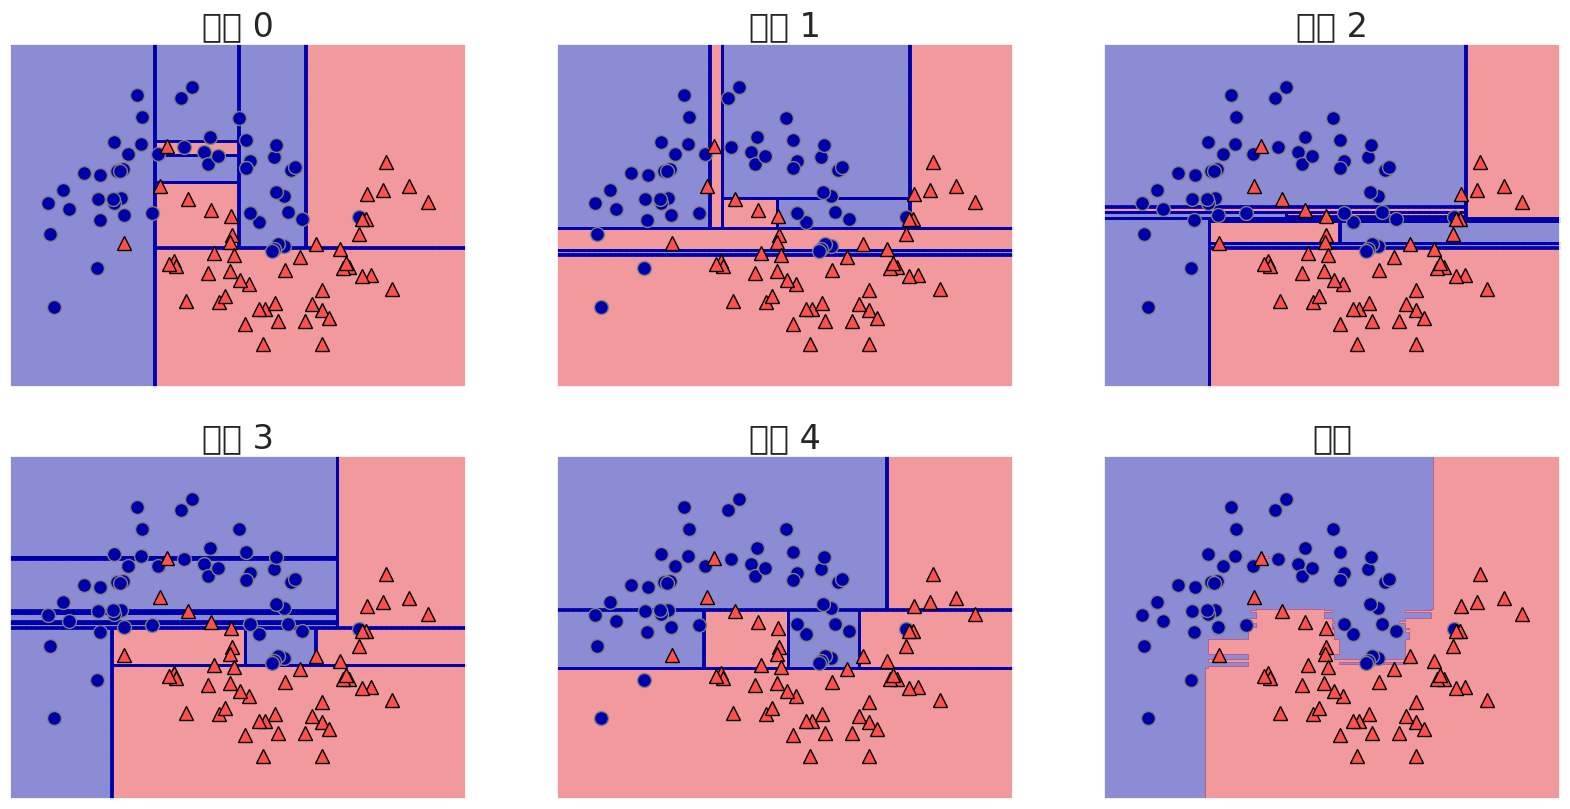

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
  ax.set_title("트리 {}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True,n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 세트 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 세트 정확도: 0.948


여기서 부터 영혼없이 침.

### Extra-trees

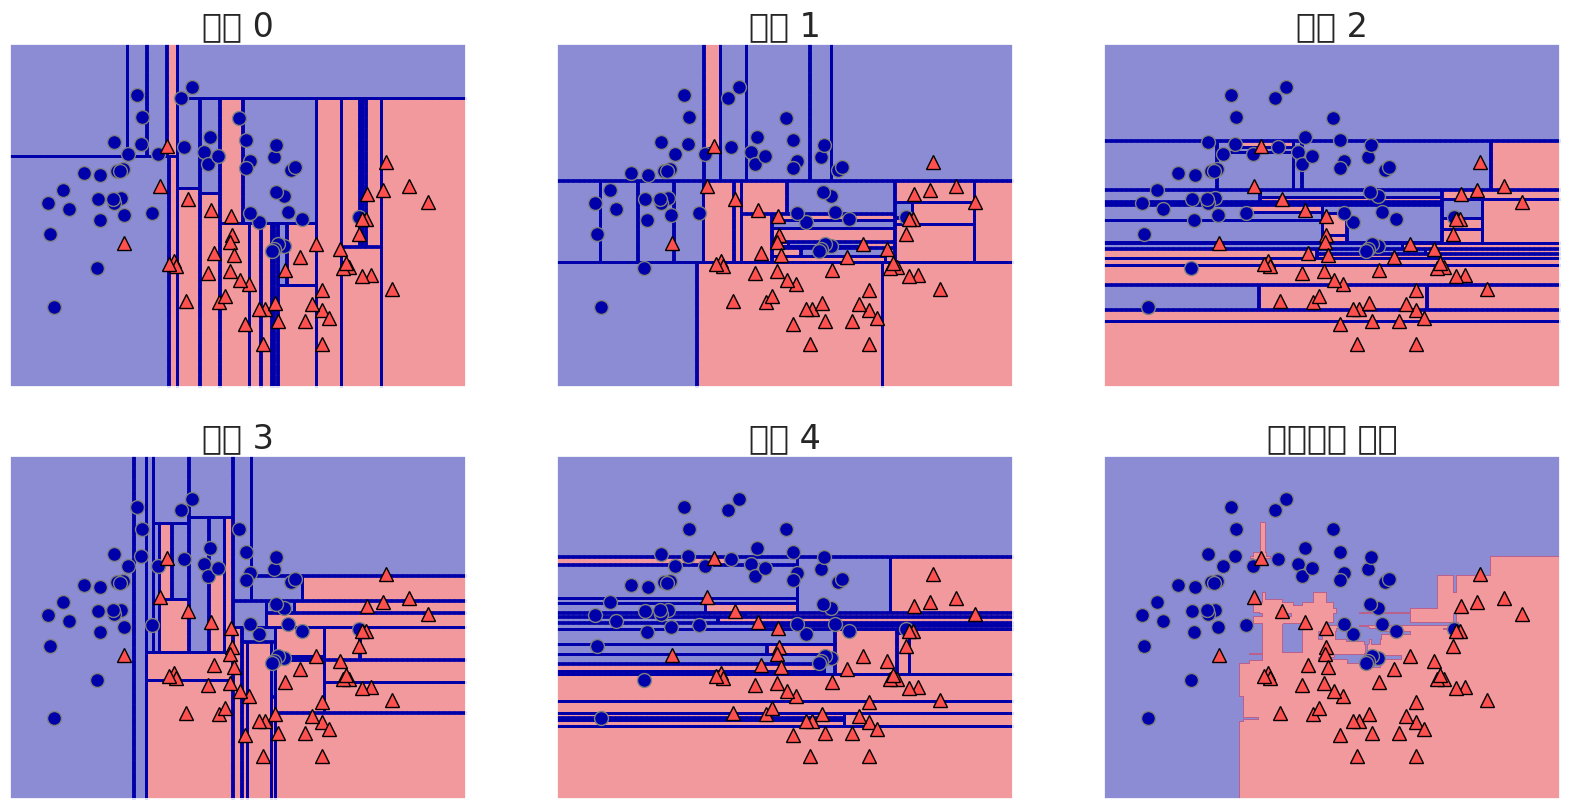

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
  ax.set_title("트리 {}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1], ym)
plt.show()

In [ ]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print('훈련 세트 정확도 {:.3f}'.format(xtree.score(Xc_train, yc_train)))
print('테스트 세트 정확도 {:.3f}'.format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도 1.000
테스트 세트 정확도 0.972


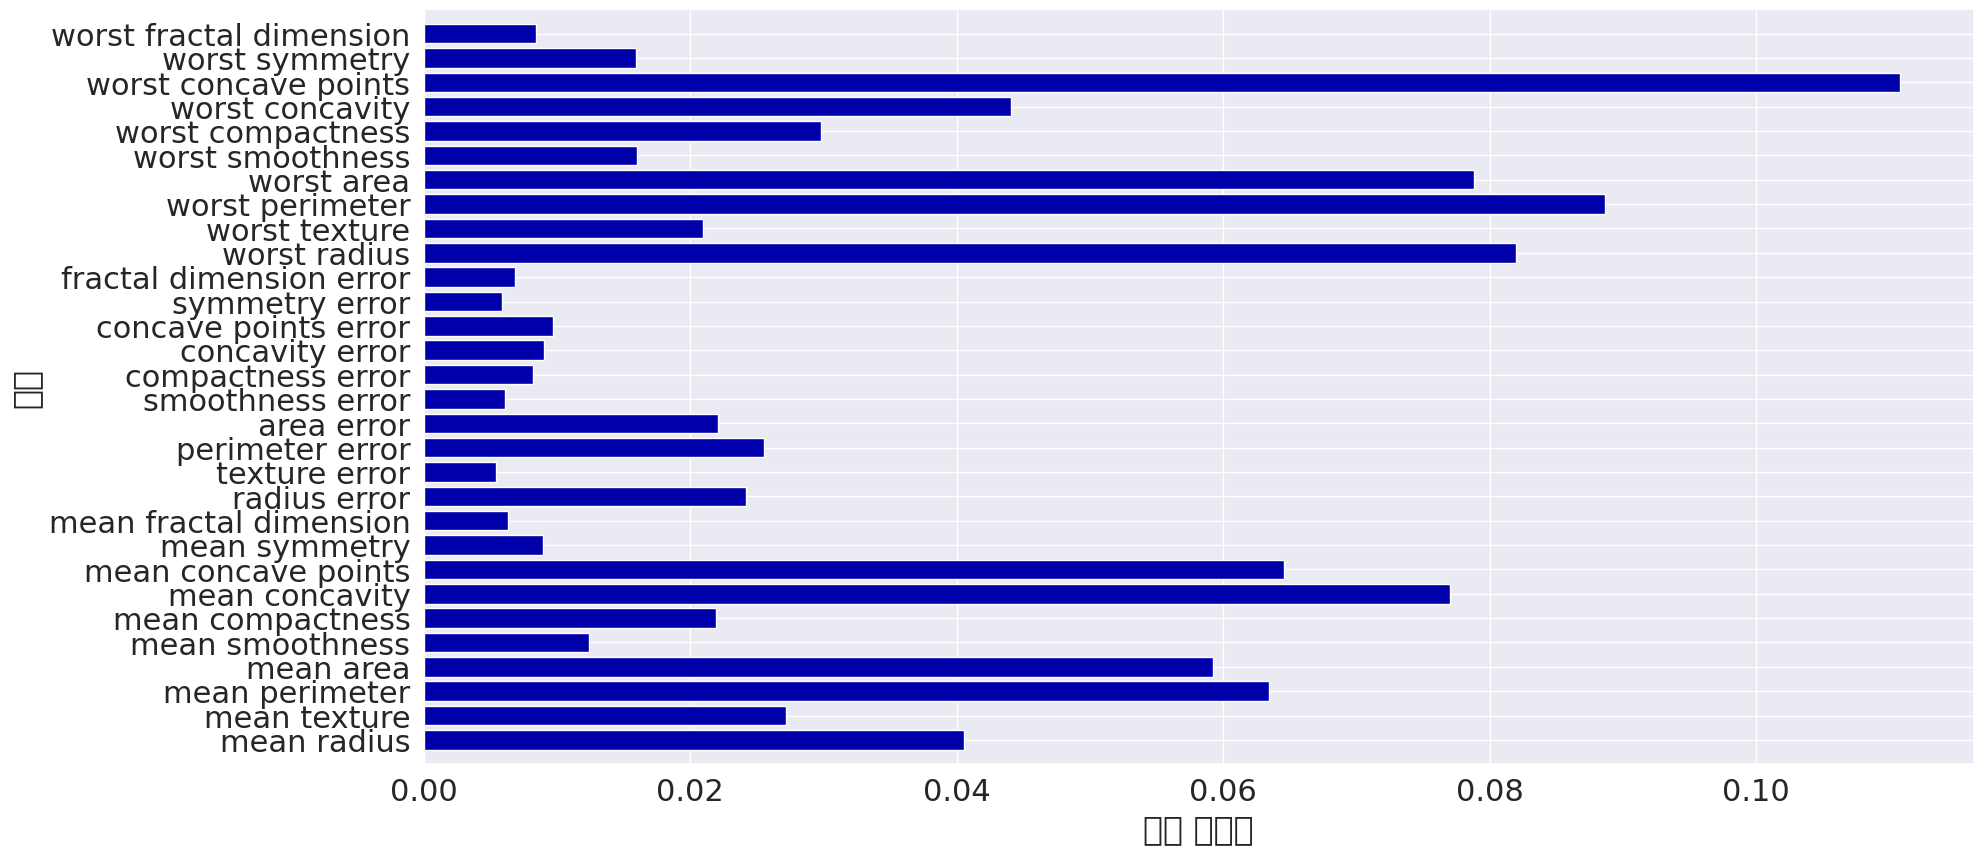

In [ ]:
n_features = cancer.data.shape[1]
plt.figure(figsize=(20,10))
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

### Adaoost

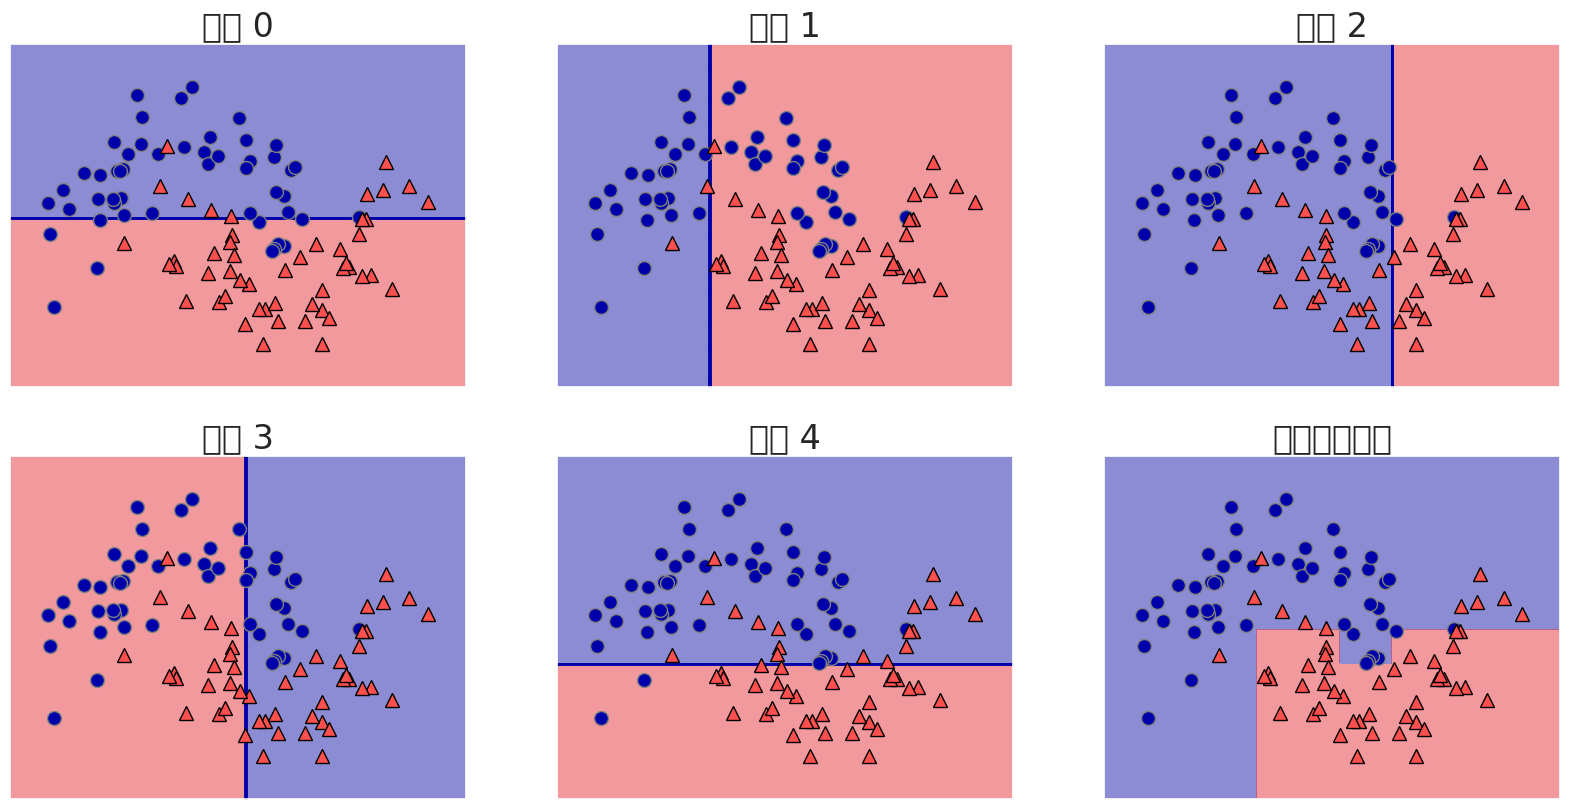

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
  ax.set_title("트리 {}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("에이다부스트")                              
mglearn.discrete_scatter(Xm[:, 0], X[:, 1], ym)
plt.show()



In [61]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print("훈련 세트 정확도 {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도 {:.3f}".format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도 1.000
테스트 세트 정확도 0.986


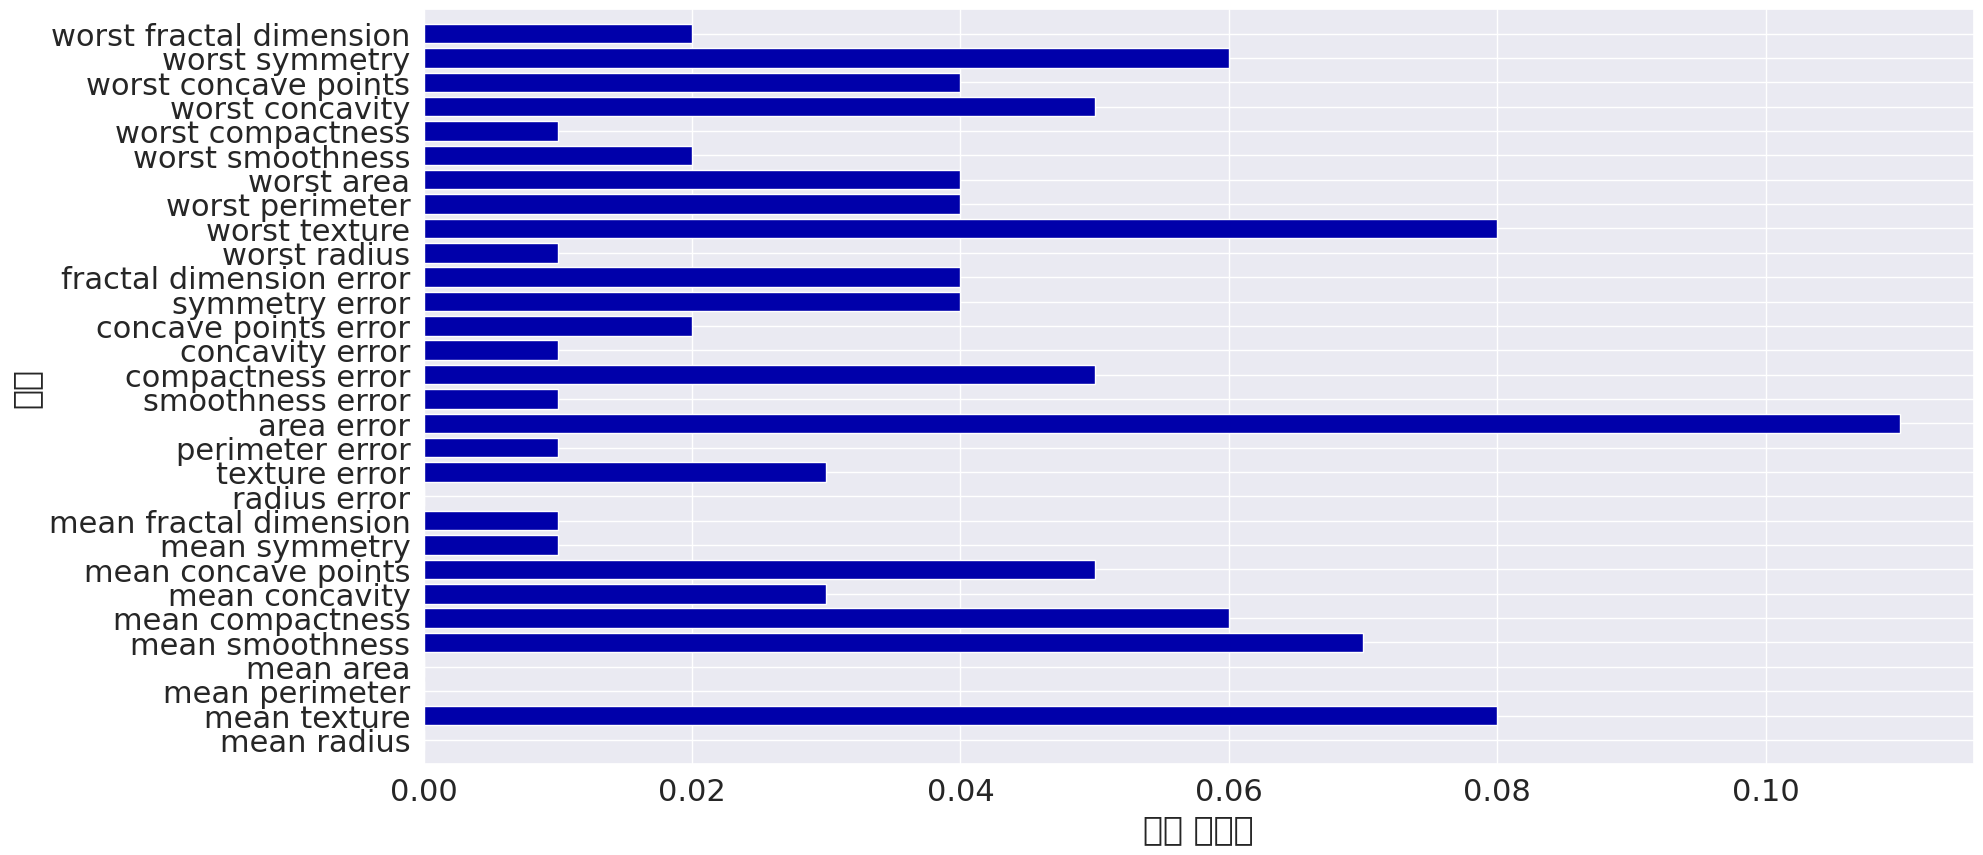

In [65]:
plt.figure(figsize=(20, 10))
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

### HistGradient

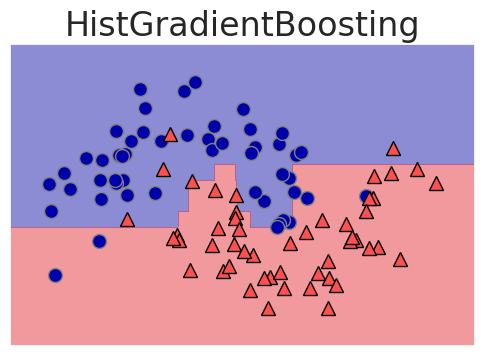

In [66]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xm_train, ym_train)

mglearn.plots.plot_2d_separator(hgb, Xm, fill=True, alpha=.4)
plt.title("HistGradientBoosting")
mglearn.discrete_scatter(Xm[:, 0], X[:, 1], ym)
plt.show()

In [68]:
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xc_train, yc_train)

print("훈련 세트 정확도 {:.3f}".format(hgb.score(Xc_train, yc_train)))
print("테스트 세트 정확도 {:.3f}".format(hgb.score(Xc_test, yc_test)))

훈련 세트 정확도 1.000
테스트 세트 정확도 0.979


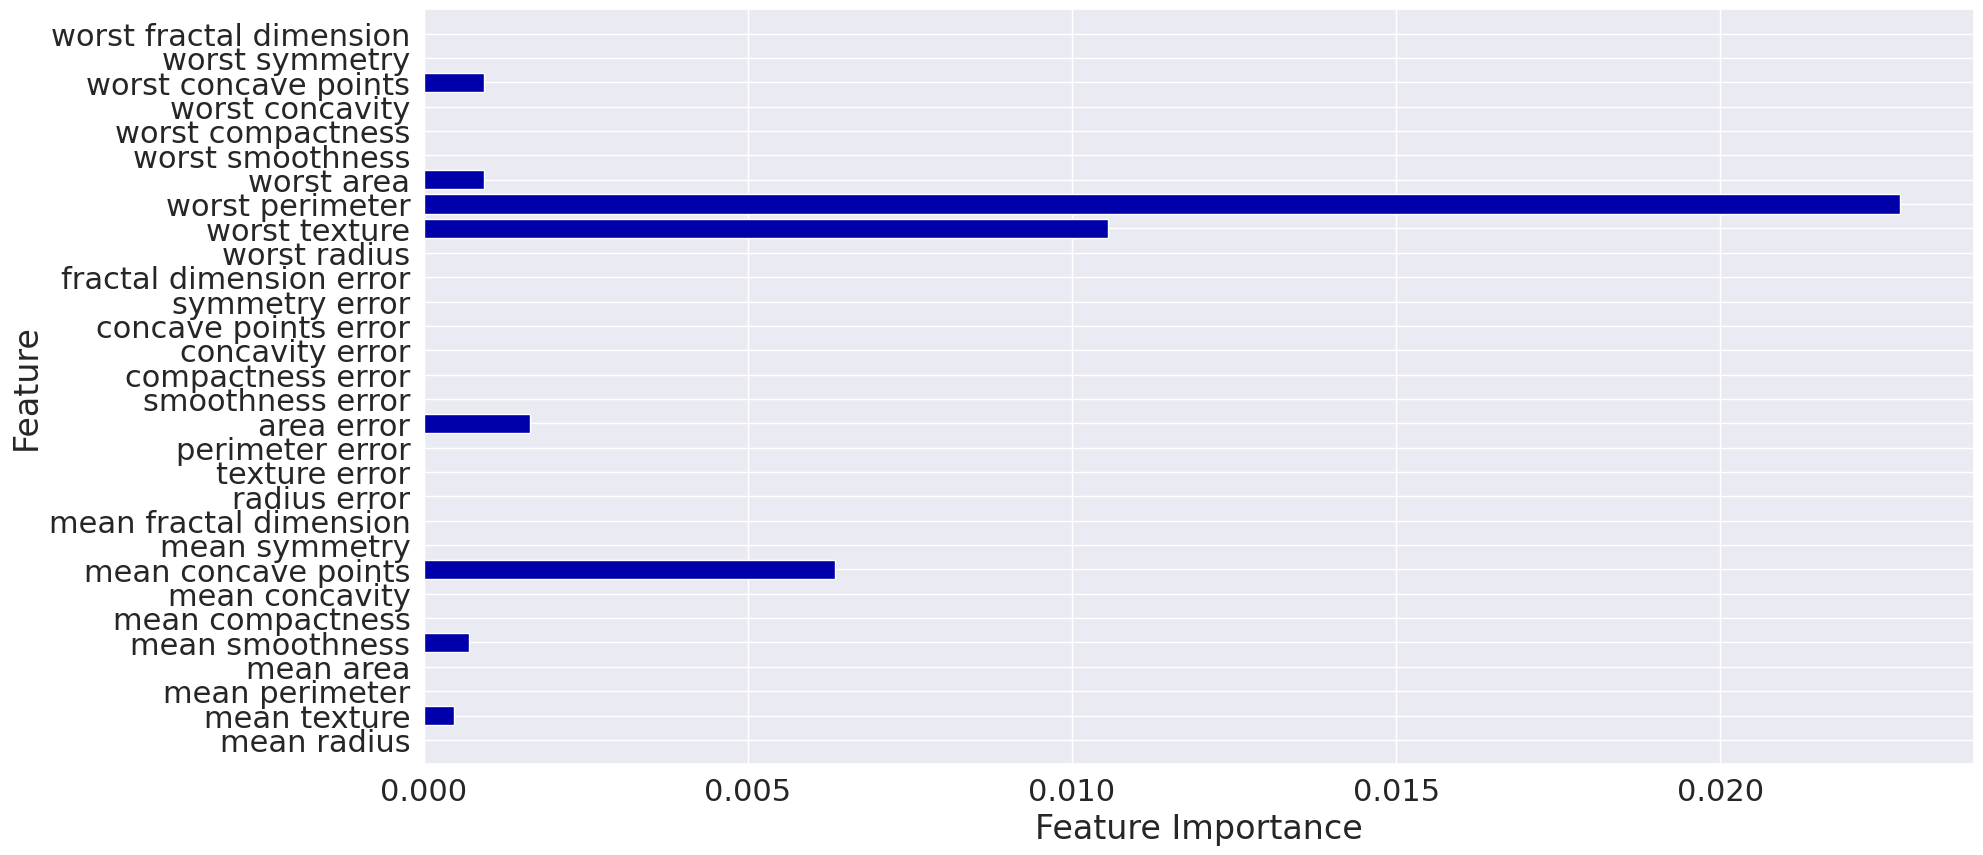

In [72]:
from sklearn.inspection import permutation_importance

result = permutation_importance(hgb, Xc_train, yc_train, n_repeats=10, random_state=42, n_jobs=-1)


plt.figure(figsize=(20, 10))
plt.barh(range(n_features), result.importances_mean, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()